In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

life_df = pd.read_csv("life_expectancy_data.csv")

In [6]:
life_df  #head and tail for exploratory data analysis

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High
...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4110.000000,Medium
179,Viet Nam,2015,Developing,76.0,127.0,28,2600.000000,High
180,Yemen,2015,Developing,65.7,224.0,37,1490.000000,Low
181,Zambia,2015,Developing,61.8,33.0,27,1313.889646,Low


<Axes: xlabel='GDP', ylabel='Life expectancy'>

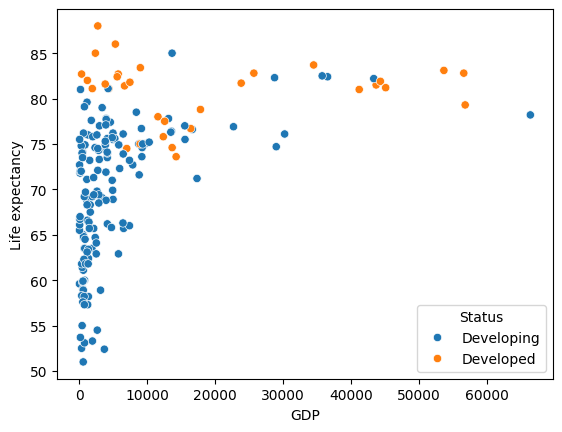

In [7]:
# Plot Life expectancy vs GDP
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy", hue = "Status")

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy'>

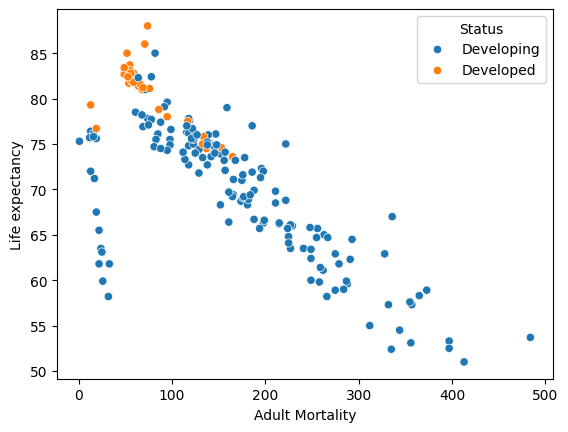

In [9]:
sns.scatterplot(data = life_df, x = "Adult Mortality", y = "Life expectancy", hue = "Status")

<Axes: xlabel='infant deaths', ylabel='Life expectancy'>

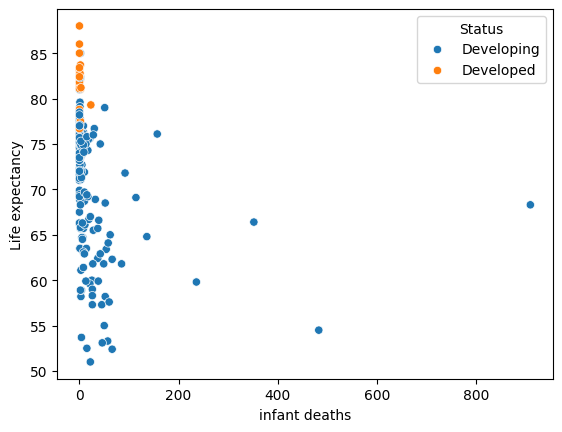

In [10]:
sns.scatterplot(data = life_df, x = "infant deaths", y = "Life expectancy", hue = "Status")

<Axes: xlabel='GDP', ylabel='Adult Mortality'>

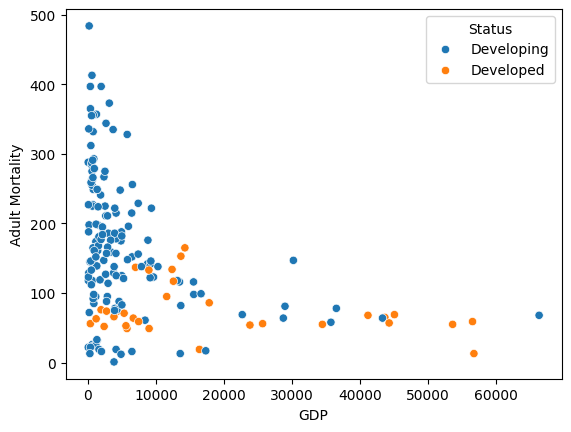

In [11]:
sns.scatterplot(data = life_df, x = "GDP", y = "Adult Mortality", hue = "Status")

<Axes: xlabel='GDP', ylabel='infant deaths'>

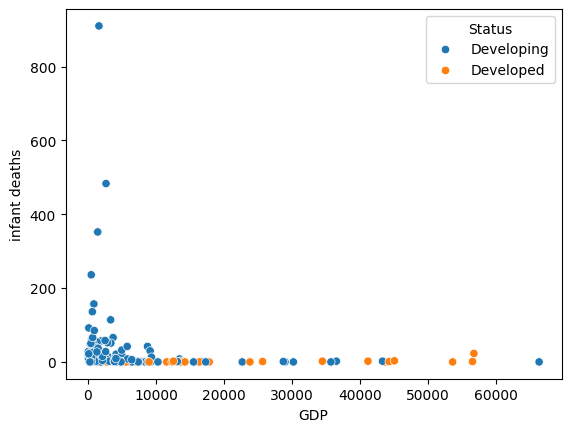

In [12]:
# Plot infant deaths versus GDP
sns.scatterplot(data = life_df, x = "GDP", y = "infant deaths", hue = "Status")

<Axes: xlabel='Adult Mortality', ylabel='infant deaths'>

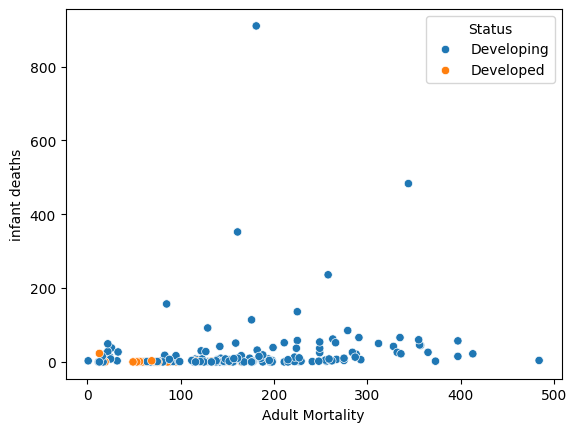

In [13]:
sns.scatterplot(data = life_df, x = "Adult Mortality", y = "infant deaths", hue = "Status")

In [14]:
feature_names = ["GDP", "Life expectancy"]
x = life_df[feature_names]

In [15]:
# Import the StandardScaler class from sklearn
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x. This will find the mean and standard
# deviation of each column in x.
scale.fit(x)
# Now we can apply the standard scaler transformation
# to re-scale each column in x.
x_scaled = scale.transform(x)

In [17]:
# Import the k-Means model
from sklearn.cluster import KMeans
# Create a list to record the inertia
# for each value of k.
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through the possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

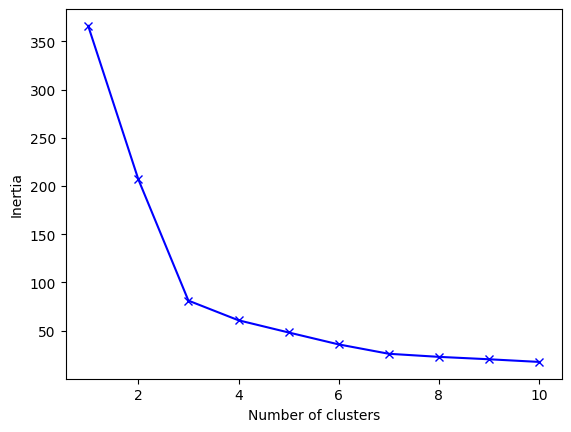

In [18]:
 # Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()

In [19]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [21]:
# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.5616
Silhouette Coefficient: 0.5460


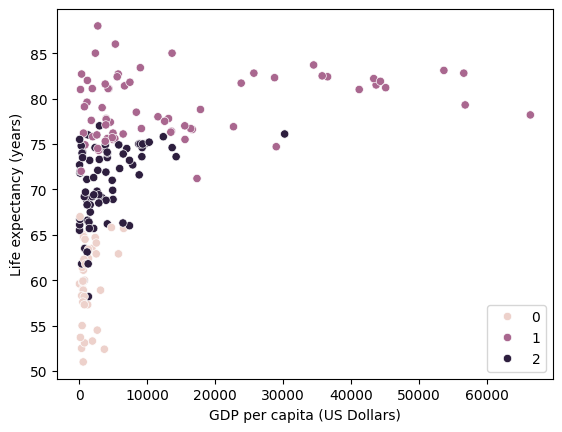

In [49]:
# Visualise the clusters in a scatter plot
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("GDP per capita (US Dollars)")
plt.ylabel("Life expectancy (years)")
# Show the figure
plt.show()

In [51]:
# Extract the input features
feature_names = ["Adult Mortality", "Life expectancy"]
x = life_df[feature_names]
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [52]:
# Create a list to record the inertia
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)
# Loop through possible values of k
for k in k_range:
    # Initialise the model
    kmeans = KMeans(n_clusters = k, random_state = 42)
    # Fit the model to the scaled data
    kmeans.fit(x_scaled)
    # Record the inertia
    inertia.append(kmeans.inertia_)

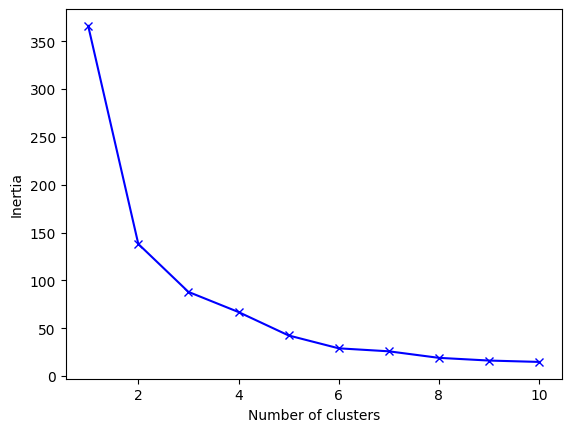

In [53]:
# Plot inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label both axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the plot
plt.show()

In [57]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [59]:
# Apply the evaluation metrics.
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.7927
Silhouette Coefficient: 0.4353


Text(0, 0.5, 'Life expectancy (years)')

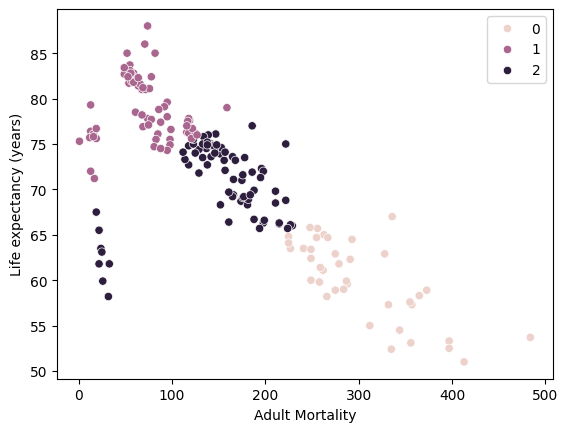

In [61]:
# Visualise the clusters
sns.scatterplot(data = life_df, x = "Adult Mortality", y = "Life expectancy", hue = cluster_labels_pred)
# Label both axes
plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy (years)")
# Show the plot

In [62]:
# Extract the input features
feature_names = ["GDP", "Life expectancy"]
x = life_df[feature_names]

In [63]:
# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [64]:
# Import the AgglomerativeClustering model from
# the sklearn library.
from sklearn.cluster import AgglomerativeClustering
# Create an instance of the AgglomerativeClustering
# class, with 3 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
# We can now fit this model to our dataset. The following
# will both fit the model and output the predicted cluster
# labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [65]:
# Apply the evaluation metrics. We don't really have a "ground truth" label, so just focus on internal measures.
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)
# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.5588
Silhouette Score: 0.4434


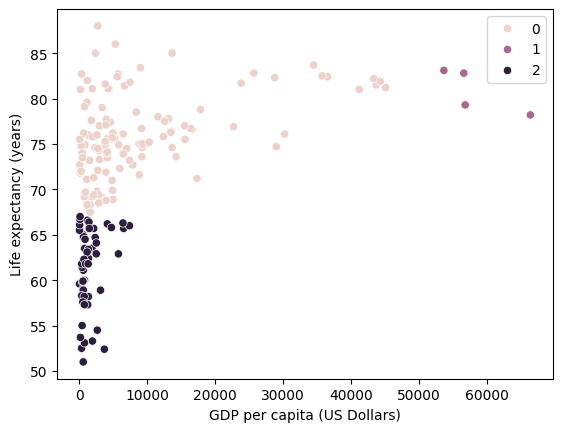

In [66]:
# Visualise the clusters in a scatter plot of Life expectancy versus GDP
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy", hue = agg_labels_pred)
# Label both axes
plt.xlabel("GDP per capita (US Dollars)")
plt.ylabel("Life expectancy (years)")
# Show the figure
plt.show()

In [40]:
# Extract the input features
feature_names = ["GDP", "Life expectancy"]
x = life_df[feature_names]

In [41]:
 # Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [42]:
# Import the DBSCAN model from sklearn.
from sklearn.cluster import DBSCAN
# Create an instance of the DBSCAN class, and
# set the eps and min_samples parameters.
dbscan = DBSCAN(eps=0.2, min_samples=3)
# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

In [43]:
 # Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, dbscan_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 1.1525
Silhouette Coefficient: 0.2999


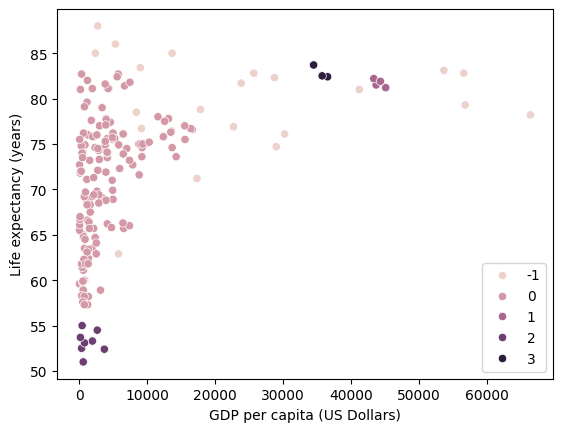

In [45]:
# Visualise the clusters
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy", hue = dbscan_labels_pred)
# Label both axes
plt.xlabel("GDP per capita (US Dollars)")
plt.ylabel("Life expectancy (years)")
# Show the plot
plt.show()